 1. Weather Data Analysis

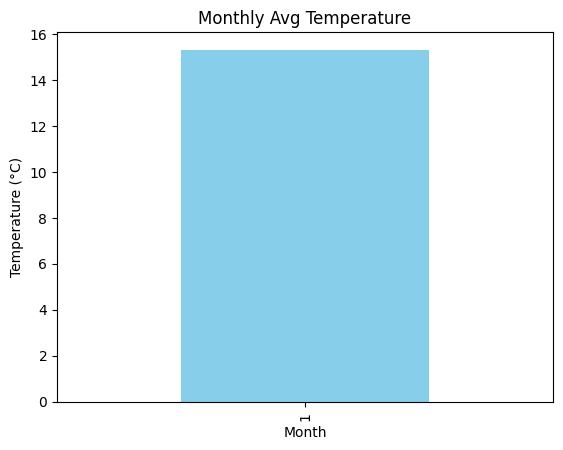

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating weather data manually (as per the question)
data = {
    "Date": pd.date_range(start="2025-01-01", periods=10, freq='D'),
    "Temperature (°C)": [15.2, 16.8, 14.5, 13.0, 17.6, 18.1, 16.2, 12.4, 13.8, 15.5],
    "Humidity (%)": [80, 75, 85, 90, 70, 65, 78, 88, 83, 79],
    "Wind Speed (km/h)": [10.5, 8, 12, 15.2, 7.4, 6, 9.1, 14.3, 11.5, 10],
    "Rainfall (mm)": [0, 0, 1.2, 5.4, 0, 0, 0.5, 2.1, 0, 0]
}
df = pd.DataFrame(data)

# Handle missing values (example: fill with mean, but here data is complete)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Extract month and calculate monthly avg temperature
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')["Temperature (°C)"].mean()

# Plot
monthly_avg.plot(kind='bar', color='skyblue', title='Monthly Avg Temperature')
plt.ylabel("Temperature (°C)")
plt.xlabel("Month")
plt.show()


2. Student Performance Analysis

In [2]:
data = {
    "Student ID": range(101, 111),
    "Name": [
        "Alice Brown", "Ben Carter", "Clara Davis", "David Evans", "Eva Foster",
        "Frank Green", "Grace Hall", "Henry Ives", "Isla Jones", "Jack King"
    ],
    "Maths": [85, 78, 92, 65, 74, 60, 88, 70, 95, 82],
    "Physics": [88, 75, 94, 68, 78, 55, 85, 72, 96, 80],
    "Chemistry": [87, 80, 90, 66, 76, 58, 86, 74, 94, 78]
}
df = pd.DataFrame(data)

# Summary statistics
print(df[["Maths", "Physics", "Chemistry"]].describe())

# Average per student
df["Average"] = df[["Maths", "Physics", "Chemistry"]].mean(axis=1)
print(df[["Student ID", "Name", "Average"]])

# Students scoring <60 in more than two subjects
df["Below_60"] = (df[["Maths", "Physics", "Chemistry"]] < 60).sum(axis=1)
at_risk = df[df["Below_60"] > 2]
print("Students with >2 subjects <60:\n", at_risk[["Student ID", "Name"]])


           Maths    Physics  Chemistry
count  10.000000  10.000000  10.000000
mean   78.900000  79.100000  78.900000
std    11.618472  12.449453  11.080012
min    60.000000  55.000000  58.000000
25%    71.000000  72.750000  74.500000
50%    80.000000  79.000000  79.000000
75%    87.250000  87.250000  86.750000
max    95.000000  96.000000  94.000000
   Student ID         Name    Average
0         101  Alice Brown  86.666667
1         102   Ben Carter  77.666667
2         103  Clara Davis  92.000000
3         104  David Evans  66.333333
4         105   Eva Foster  76.000000
5         106  Frank Green  57.666667
6         107   Grace Hall  86.333333
7         108   Henry Ives  72.000000
8         109   Isla Jones  95.000000
9         110    Jack King  80.000000
Students with >2 subjects <60:
 Empty DataFrame
Columns: [Student ID, Name]
Index: []


 3. Flight Data Analysis
Assuming the following CSV columns: Airline,Origin,Destination,Departure Delay (minutes)

count    10.000000
mean     12.000000
std      10.327956
min       0.000000
25%       5.000000
50%      10.000000
75%      18.750000
max      30.000000
Name: Departure Delay (minutes), dtype: float64
Airline
AirX     5.000000
AirY    11.666667
AirZ    21.666667
Name: Departure Delay (minutes), dtype: float64
Most common origin: DEL
Most common destination: MUM


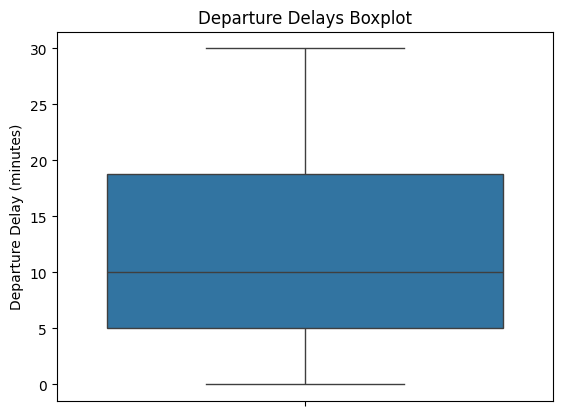

In [3]:
import seaborn as sns

# Load your data (here simulated)
data = {
    'Airline': ['AirX', 'AirY', 'AirX', 'AirZ', 'AirY', 'AirZ', 'AirX', 'AirY', 'AirZ', 'AirX'],
    'Origin': ['DEL', 'BLR', 'DEL', 'BLR', 'MUM', 'MUM', 'BLR', 'DEL', 'MUM', 'DEL'],
    'Destination': ['MUM', 'DEL', 'BLR', 'MUM', 'DEL', 'BLR', 'MUM', 'MUM', 'DEL', 'BLR'],
    'Departure Delay (minutes)': [10, 15, 5, 30, 0, 25, 5, 20, 10, 0]
}
df = pd.DataFrame(data)

# Summary statistics
print(df["Departure Delay (minutes)"].describe())

# Average delay by airline
print(df.groupby("Airline")["Departure Delay (minutes)"].mean())

# Most common origin & destination
print("Most common origin:", df['Origin'].mode()[0])
print("Most common destination:", df['Destination'].mode()[0])

# Boxplot of delays
sns.boxplot(y="Departure Delay (minutes)", data=df)
plt.title("Departure Delays Boxplot")
plt.show()


4. Euclidean Distance and Dot Product

In [4]:
import numpy as np

# Euclidean Distance between 2 points
p1 = np.array([3, 4])
p2 = np.array([7, 1])
distance = np.linalg.norm(p1 - p2)
print("Euclidean Distance:", distance)

# Dot product of two matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
dot_product = np.dot(A, B)
print("Dot Product:\n", dot_product)


Euclidean Distance: 5.0
Dot Product:
 [[19 22]
 [43 50]]


5.Time Series Data Analysis

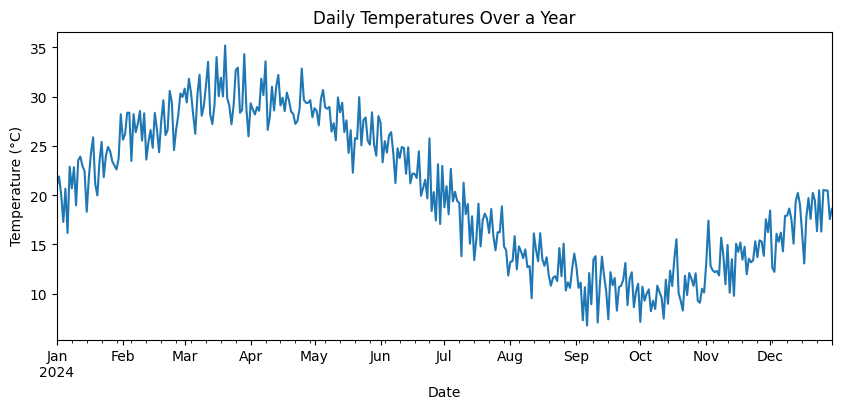

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate time series data
dates = pd.date_range(start="2024-01-01", periods=365)
temps = 20 + 10 * np.sin(np.linspace(0, 2 * np.pi, 365)) + np.random.normal(0, 2, 365)

df = pd.DataFrame({"Date": dates, "Temperature": temps})
df.set_index("Date", inplace=True)

# Plot
df['Temperature'].plot(figsize=(10, 4), title="Daily Temperatures Over a Year")
plt.ylabel("Temperature (°C)")
plt.show()


6. Stock Price Simulation & Analysis

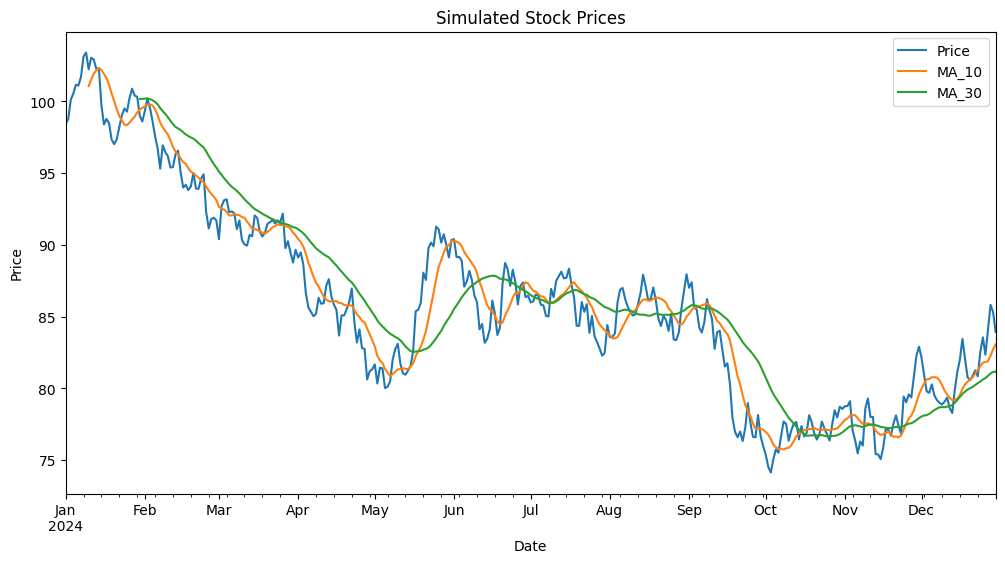

In [6]:
# Simulate stock prices
days = 365
dates = pd.date_range("2024-01-01", periods=days)
prices = 100 + np.cumsum(np.random.normal(0, 1, days))

df = pd.DataFrame({"Date": dates, "Price": prices})
df.set_index("Date", inplace=True)

# Moving Averages
df["MA_10"] = df["Price"].rolling(window=10).mean()
df["MA_30"] = df["Price"].rolling(window=30).mean()

# Plot
df.plot(figsize=(12, 6), title="Simulated Stock Prices")
plt.ylabel("Price")
plt.show()


7. Basic Pandas Operations on Fruits Data

In [7]:
import pandas as pd

# Data
data = ['Apple', 'Banana', 'Cherry', 'Date']
prices = [100, 30, 150, 90]

# DataFrame
fruits_df = pd.DataFrame(list(zip(data, prices)), columns=['Fruit', 'Price'])

# Info
fruits_df.info()

# Print entire DataFrame
print(fruits_df.to_string(index=False))

# Stats
print(fruits_df["Price"].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fruit   4 non-null      object
 1   Price   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes
 Fruit  Price
 Apple    100
Banana     30
Cherry    150
  Date     90
count      4.000000
mean      92.500000
std       49.244289
min       30.000000
25%       75.000000
50%       95.000000
75%      112.500000
max      150.000000
Name: Price, dtype: float64
